# Read CSV

In [25]:
import pandas as pd

In [75]:
df = pd.read_csv('/content/Height-Weight Data.csv')
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [27]:
df.Height.head(2)

0    73.847017
1    68.781904
Name: Height, dtype: float64

In [21]:
df[3:8] # df[1:] will return data from row 1 to (last - 1) row
# so df[n:m] will return from n to (m-1) row

,Height,Weight
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111


In [22]:
df.shape 
# return dimension of the dataframe in tuple format

(3501, 2)

In [24]:
row, col = df.shape
print(f"row: {row}, column: {col}")

row: 3501, column: 2


# Data Visualization

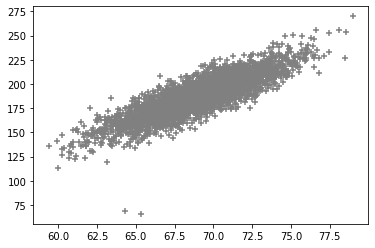

In [31]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], color='gray', marker='+')

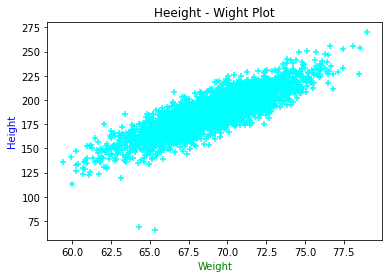

In [36]:
plt.xlabel("Weight", color='green')
plt.ylabel("Height", color='blue')
plt.title("Heeight - Wight Plot")
plt.scatter(df['Height'], df['Weight'], color='cyan', marker='+')

# Column mean

In [39]:
print(f"{df.Height.mean()} - {df.Weight.mean()}")

69.02441087268797 - 186.89125797946284


# Dataset Split

In [76]:
col_x = df[['Height']]
# df['Height'] will return panda's Series type data
# on the otherhand df[['Height']] will return panda's dataframe. here we need this type to proceed
col_y = df[['Weight']]

In [70]:
print(type(col_y))
print('----')
print(col_x.head())
print('----')
print(col_y.head())
print(col_x[325:326])


<class 'pandas.core.frame.DataFrame'>
----
      Height
0  73.847017
1  68.781904
2  74.110105
3  71.730978
4  69.881796
----
       Weight
0  241.893563
1  162.310473
2  212.740856
3  220.042470
4  206.349801
        Height
325  68.596663


In [77]:
from sklearn.model_selection import train_test_split

In [88]:
xtrain, xtest, ytrain, ytest = train_test_split(col_x, col_y, test_size=0.30)

In [79]:
print(xtrain.head())

         Height
2816  67.303386
1248  67.919279
2028  67.995200
598   73.899939
1382  66.908837


# Model Creation

In [80]:
from sklearn.linear_model import LinearRegression

In [89]:
l_reg = LinearRegression()

In [90]:
l_reg.fit(xtrain, ytrain) # Training

LinearRegression()

In [91]:
l_reg.predict([[174]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[811.54204864]])

In [92]:
df['predicted results'] = l_reg.predict(col_x)

In [93]:
df

,Height,Weight,predicted results
0,73.847017,241.893563,215.509670
1,68.781904,162.310473,185.366071
2,74.110105,212.740856,217.075366
3,71.730978,220.042470,202.916659
4,69.881796,206.349801,191.911768
...,...,...,...
3496,69.296830,185.649086,188.430508
3497,70.542201,210.198845,195.841987
3498,73.912549,202.429960,215.899666
3499,67.396021,144.277671,177.118375


In [94]:
test_predictions = l_reg.predict(xtest) # predict on the test set data

In [95]:
test_predictions

array([[177.02337672],
       [206.02970096],
       [210.64796972],
       ...,
       [182.57266151],
       [186.21950421],
       [213.04419514]])

# MSE, MAE

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [98]:
mse = mean_squared_error(ytest, test_predictions)
mse

99.70901196523813

In [99]:
mae = mean_absolute_error(ytest, test_predictions)
mae

8.021118769104932

In [100]:
xtest

,Height
501,67.380058
2206,72.254071
776,73.030092
1248,67.919279
1388,67.294018
...,...
1309,65.713608
2377,71.120827
2321,68.312520
2415,68.925309


# New Section

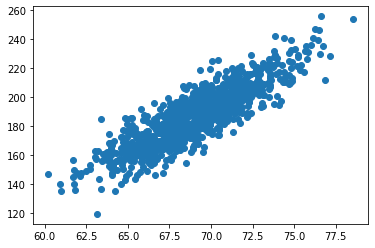

In [104]:
plt.scatter(xtest, ytest)

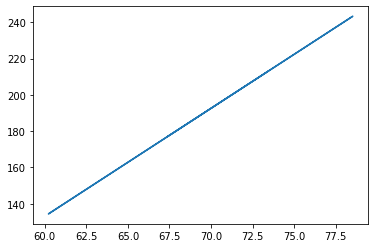

In [106]:
plt.plot(xtest, test_predictions)

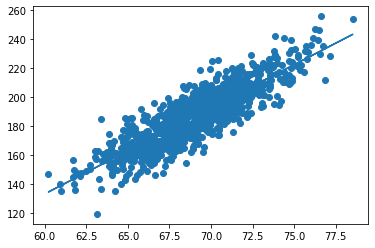

In [107]:
plt.scatter(xtest, ytest)
plt.plot(xtest, test_predictions)

Text(0.5, 1.0, 'Height - Weight')

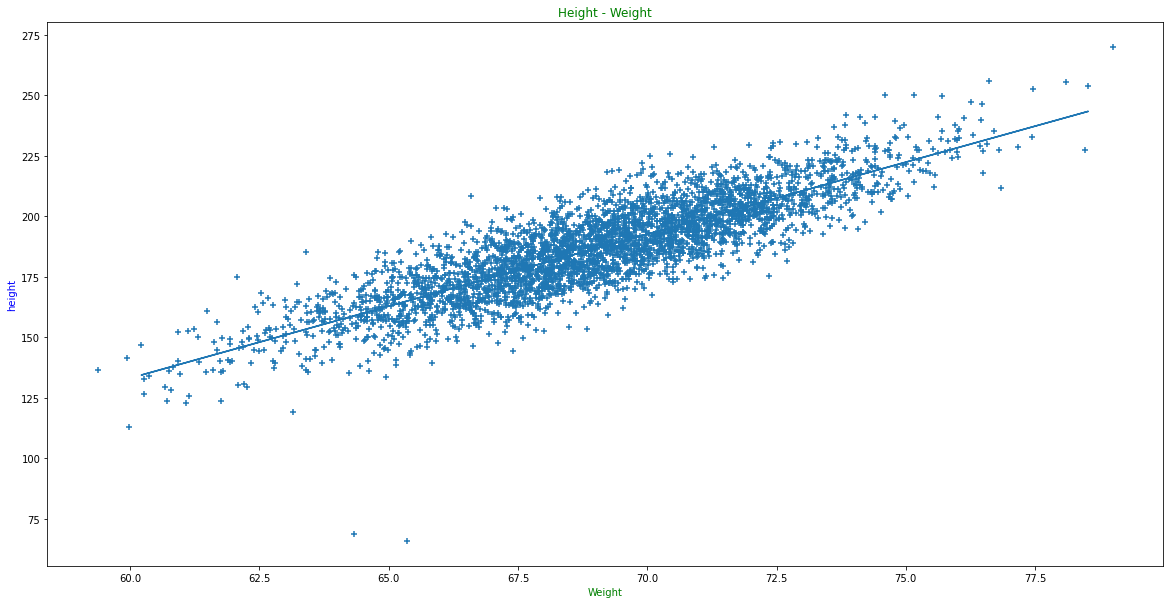

In [110]:
plt.figure(figsize=(20,10))
plt.scatter(df['Height'], df['Weight'], marker='+')
plt.plot(xtest, test_predictions)
plt.xlabel('Weight', color='green')
plt.ylabel('height', color='blue')
plt.title('Height - Weight', color='green')